# **Importing Important Libaries**

In [ ]:
# Computing Libaries
import numpy as np
import pandas as pd
# Ploting Libaries
import matplotlib.pyplot as plt
import seaborn as sns

# Pre Proccessing Modules
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
# Accuracy Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# options
import warnings
warnings.filterwarnings('ignore')

# **Loading Dataset**

In [ ]:
data = pd.read_csv('/data/data.csv')
#testSet = pd.read_csv('/data/test.csv')

# **Pre Processing of Dataset**

In [ ]:
# Viewing no# of columns in the dataset:
columns = data.columns
print(columns)

Index(['ID', 'sequence1', 'sequence2', 'sequence3', 'sequence4', 'sequence5',
       'sequence6', 'sequence7', 'sequence8', 'sequence9', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
       'S', 'T', 'U', 'mutation'],
      dtype='object')


In [ ]:
# Viewing initial statistics of dataset:
data.describe()

,ID,A,B,C,D,E,F,G,H,I,...,M,N,O,P,Q,R,S,T,U,mutation
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,150259.572350,8.118989,2.632989,0.617833,4.802733,29.696178,1.262467,23.543444,33.423717,1.605150,...,0.516286,0.474217,0.505086,0.501836,0.487837,0.501700,0.487640,0.469766,0.507951,0.264900
std,86591.625009,3.078097,4.147355,1.191218,1.514448,12.700896,2.109440,13.897618,18.991241,2.752459,...,0.214696,0.216486,0.227391,0.241277,0.211201,0.203394,0.178990,0.194466,0.203378,0.441281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.099276,-0.045316,0.169495,-0.033695,0.005199,0.093056,0.024139,0.215575,0.097789,0.000000
25%,75313.750000,7.000000,0.000000,0.000000,4.000000,33.000000,0.000000,9.000000,19.000000,0.000000,...,0.325804,0.291995,0.279693,0.276133,0.323797,0.353174,0.358795,0.310106,0.367429,0.000000
50%,150321.000000,8.000000,0.000000,0.000000,4.000000,33.000000,0.000000,23.000000,38.000000,0.000000,...,0.471377,0.388573,0.480476,0.554751,0.517962,0.435187,0.410841,0.408567,0.446227,0.000000
75%,225293.250000,10.000000,3.000000,1.000000,5.000000,33.000000,2.000000,35.000000,49.000000,2.000000,...,0.704146,0.645087,0.725755,0.735208,0.607613,0.642035,0.611452,0.587050,0.581691,1.000000
max,299999.000000,14.000000,18.000000,12.000000,19.000000,83.000000,15.000000,50.000000,60.000000,18.000000,...,1.016600,0.951018,0.856975,0.853022,0.960912,1.035818,1.054257,1.005652,1.011331,1.000000


In [ ]:
# Viewing Dataset Schema (column description):
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 32 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         180000 non-null  int64  
 1   sequence1  180000 non-null  object 
 2   sequence2  180000 non-null  object 
 3   sequence3  180000 non-null  object 
 4   sequence4  180000 non-null  object 
 5   sequence5  180000 non-null  object 
 6   sequence6  180000 non-null  object 
 7   sequence7  180000 non-null  object 
 8   sequence8  180000 non-null  object 
 9   sequence9  180000 non-null  object 
 10  A          180000 non-null  int64  
 11  B          180000 non-null  int64  
 12  C          180000 non-null  int64  
 13  D          180000 non-null  int64  
 14  E          180000 non-null  int64  
 15  F          180000 non-null  int64  
 16  G          180000 non-null  int64  
 17  H          180000 non-null  int64  
 18  I          180000 non-null  int64  
 19  J          180000 non-n

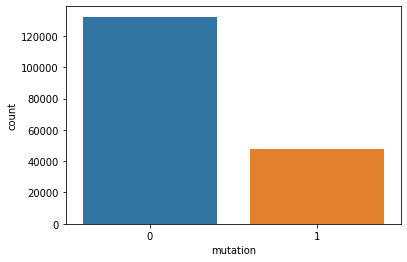

In [ ]:
# Viewing Target Varaible Distribution:
sns.countplot(x= data['mutation'], data=data)

**Tackling Missing Values**

In [ ]:
# Viewing Null Columns:
data.isnull().sum()

ID           0
sequence1    0
sequence2    0
sequence3    0
sequence4    0
sequence5    0
sequence6    0
sequence7    0
sequence8    0
sequence9    0
A            0
B            0
C            0
D            0
E            0
F            0
G            0
H            0
I            0
J            0
K            0
L            0
M            0
N            0
O            0
P            0
Q            0
R            0
S            0
T            0
U            0
mutation     0
dtype: int64

In [ ]:
# Droping NA Values:
data1 = data.dropna()
data1.isnull().sum()

ID           0
sequence1    0
sequence2    0
sequence3    0
sequence4    0
sequence5    0
sequence6    0
sequence7    0
sequence8    0
sequence9    0
A            0
B            0
C            0
D            0
E            0
F            0
G            0
H            0
I            0
J            0
K            0
L            0
M            0
N            0
O            0
P            0
Q            0
R            0
S            0
T            0
U            0
mutation     0
dtype: int64

# **Spliting Dataset**

In [ ]:
# Extracting categorical columns:
catFeatures= [col for col in data1.columns if col in data1.select_dtypes(include=object).columns]
# Extracting All Features:
features = [col for col in data1.columns if col not in ['ID', 'mutation']]

# Printing Count of Features:
print(f'total features: {len(features)}')
# Printing Name of  Features:
print(features)

total features: 30
['sequence1', 'sequence2', 'sequence3', 'sequence4', 'sequence5', 'sequence6', 'sequence7', 'sequence8', 'sequence9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U']


In [ ]:
# Spliting Features and Target Variable:
X, y = data1.loc[:, features], data1.loc[:, 'mutation']
# Checking Dataset Shape (Features):
print(X.shape)

(180000, 30)


In [ ]:
# Encoding Categorical Data (!use oneHot Encoding as target features are more)
labelEncode = LabelEncoder()
# Iterating Over each categorial features:
for col in catFeatures:
    # storing its numerical value:
    X[col] = labelEncode.fit_transform(data1[col])

In [ ]:
# Checking Columns Values:
print(X.columns)
# Checking its updated Values:
X.head()

Index(['sequence1', 'sequence2', 'sequence3', 'sequence4', 'sequence5',
       'sequence6', 'sequence7', 'sequence8', 'sequence9', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
       'S', 'T', 'U'],
      dtype='object')


,sequence1,sequence2,sequence3,sequence4,sequence5,sequence6,sequence7,sequence8,sequence9,A,...,L,M,N,O,P,Q,R,S,T,U
0,0,0,0,0,0,0,1,1,0,8,...,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915
1,0,0,1,0,0,0,1,1,0,10,...,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452
2,0,0,0,0,0,0,1,1,0,8,...,0.413038,0.524760,0.580085,0.301498,0.261055,0.193988,0.935688,0.685868,0.277694,0.428115
3,0,0,0,0,0,1,0,3,3,5,...,0.966719,0.943545,0.209744,0.670577,0.772650,0.845751,0.507320,0.927204,0.605755,0.454155
4,0,1,0,1,1,1,0,1,3,11,...,0.302896,0.397622,0.506096,0.200673,0.734145,0.521673,0.365571,0.416094,0.584799,0.447149


# **Visualization**

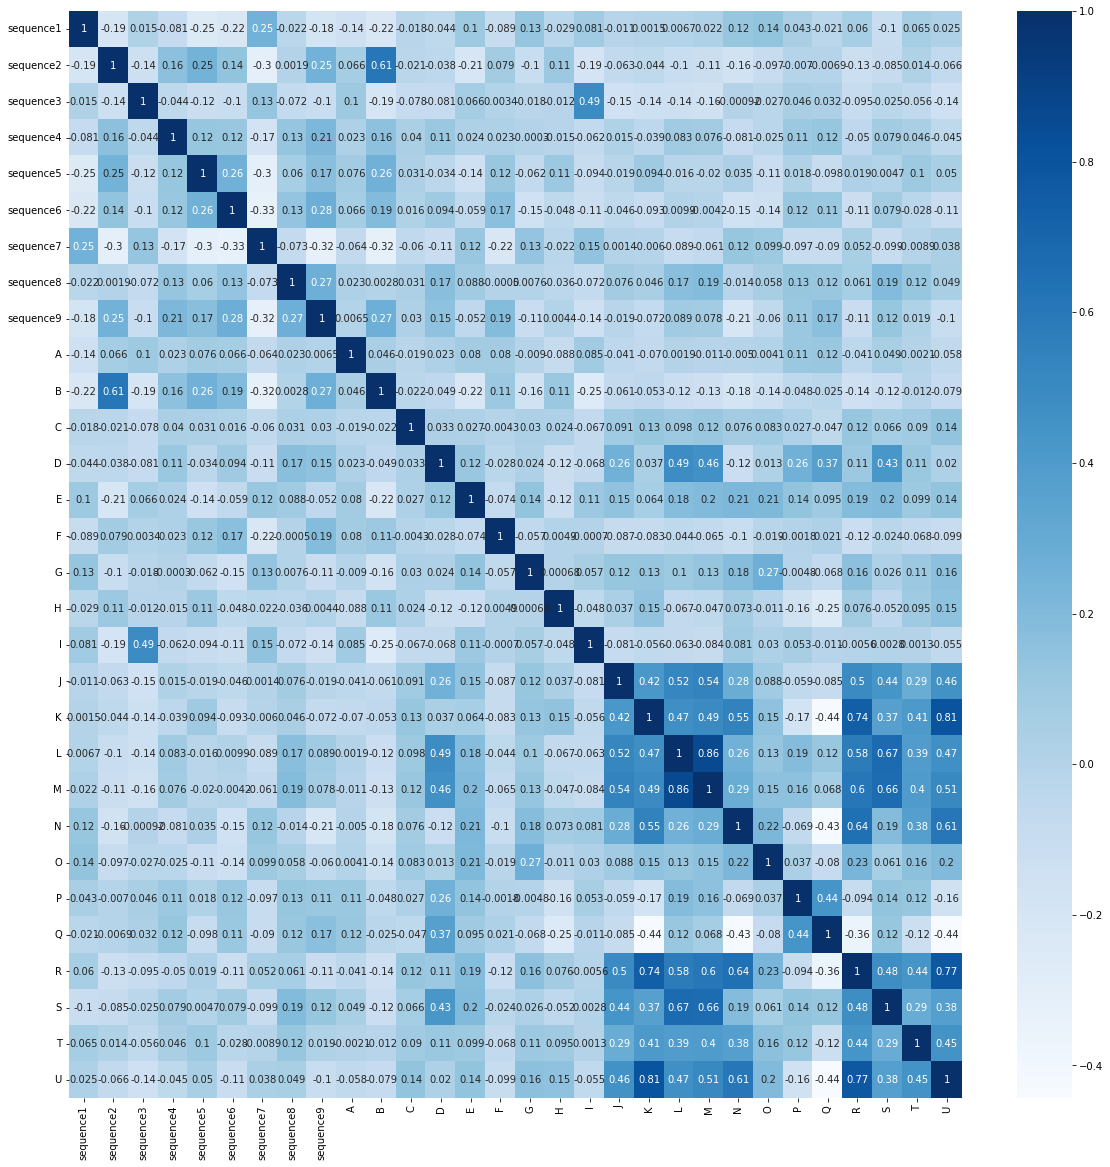

In [ ]:
# Correlation Matrix:
plt.figure(figsize = (20,20))
corr = X.corr()
# print(corr)

# Ploting Heatmap:
sns.heatmap(corr, annot = True,cmap=plt.cm.Blues )
plt.show()

In [ ]:
# Spliting the Sequence and Alphabets:
sequences = X[['sequence1', 'sequence2', 'sequence3', 'sequence4', 'sequence5',
       'sequence6', 'sequence7', 'sequence8', 'sequence9']]
alphabets = X[['A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
       'S', 'T', 'U']]       

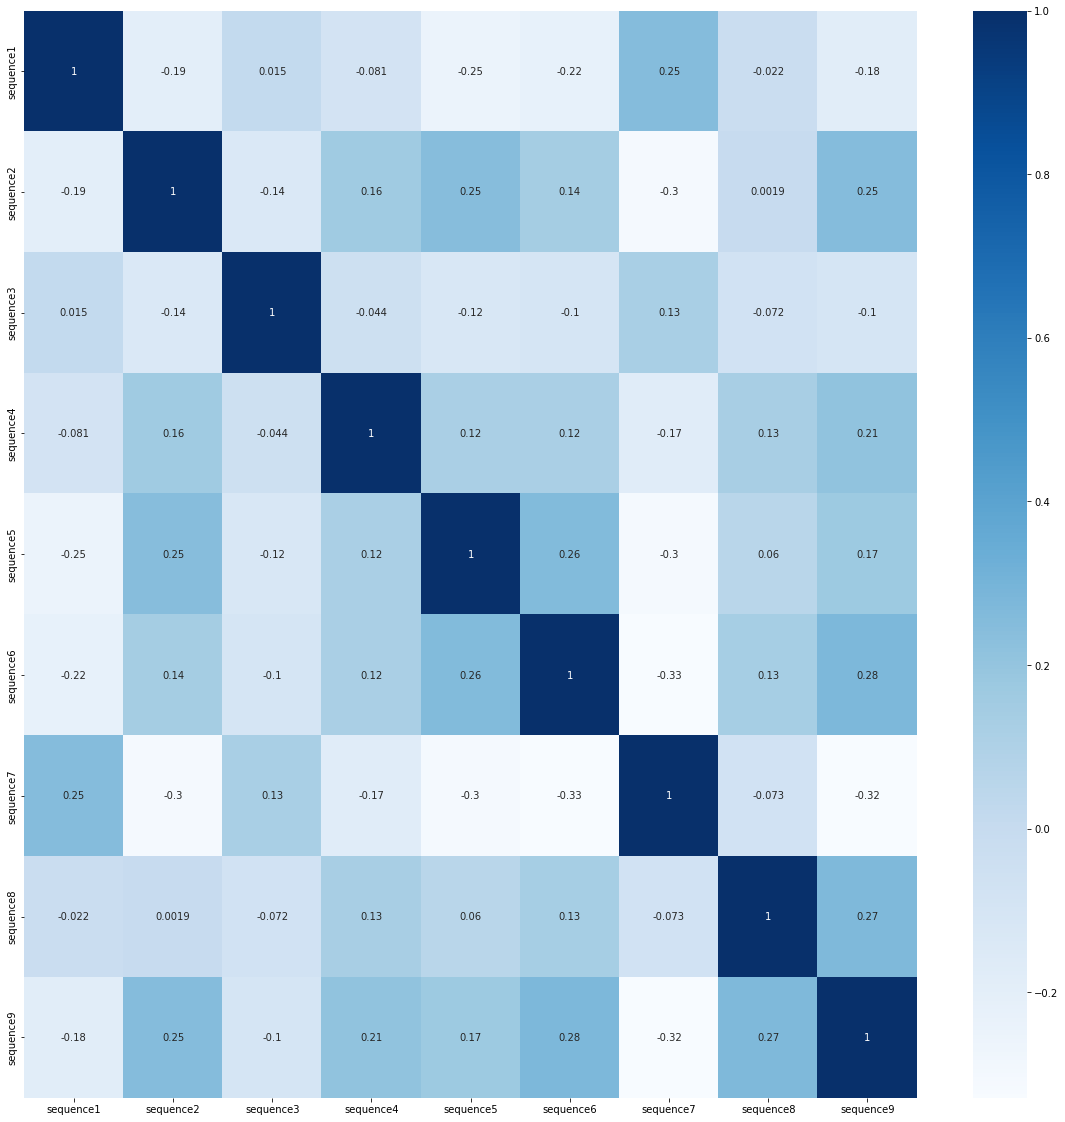

In [ ]:
# Ploting Sequence Correleration:
xSeq = sequences
plt.figure(figsize = (20,20))

# Determining Correleration and Ploting Heatmap:
xSeq = xSeq.corr()
sns.heatmap(xSeq, annot = True, cmap=plt.cm.Blues )
plt.show()

In [ ]:
## Selecting High Correlerated Values:
# Iterating over the sequence:
for i in sequences:
  xSeqCorr = xSeq[i]
  # Selecting Features over 0.2:
  relevantFeaturesSeq = xSeqCorr[xSeqCorr > 0.2]
  print(relevantFeaturesSeq)

sequence1    1.000000
sequence7    0.252031
Name: sequence1, dtype: float64
sequence2    1.000000
sequence5    0.246118
sequence9    0.251836
Name: sequence2, dtype: float64
sequence3    1.0
Name: sequence3, dtype: float64
sequence4    1.000000
sequence9    0.214437
Name: sequence4, dtype: float64
sequence2    0.246118
sequence5    1.000000
sequence6    0.258852
Name: sequence5, dtype: float64
sequence5    0.258852
sequence6    1.000000
sequence9    0.277640
Name: sequence6, dtype: float64
sequence1    0.252031
sequence7    1.000000
Name: sequence7, dtype: float64
sequence8    1.000000
sequence9    0.269363
Name: sequence8, dtype: float64
sequence2    0.251836
sequence4    0.214437
sequence6    0.277640
sequence8    0.269363
sequence9    1.000000
Name: sequence9, dtype: float64


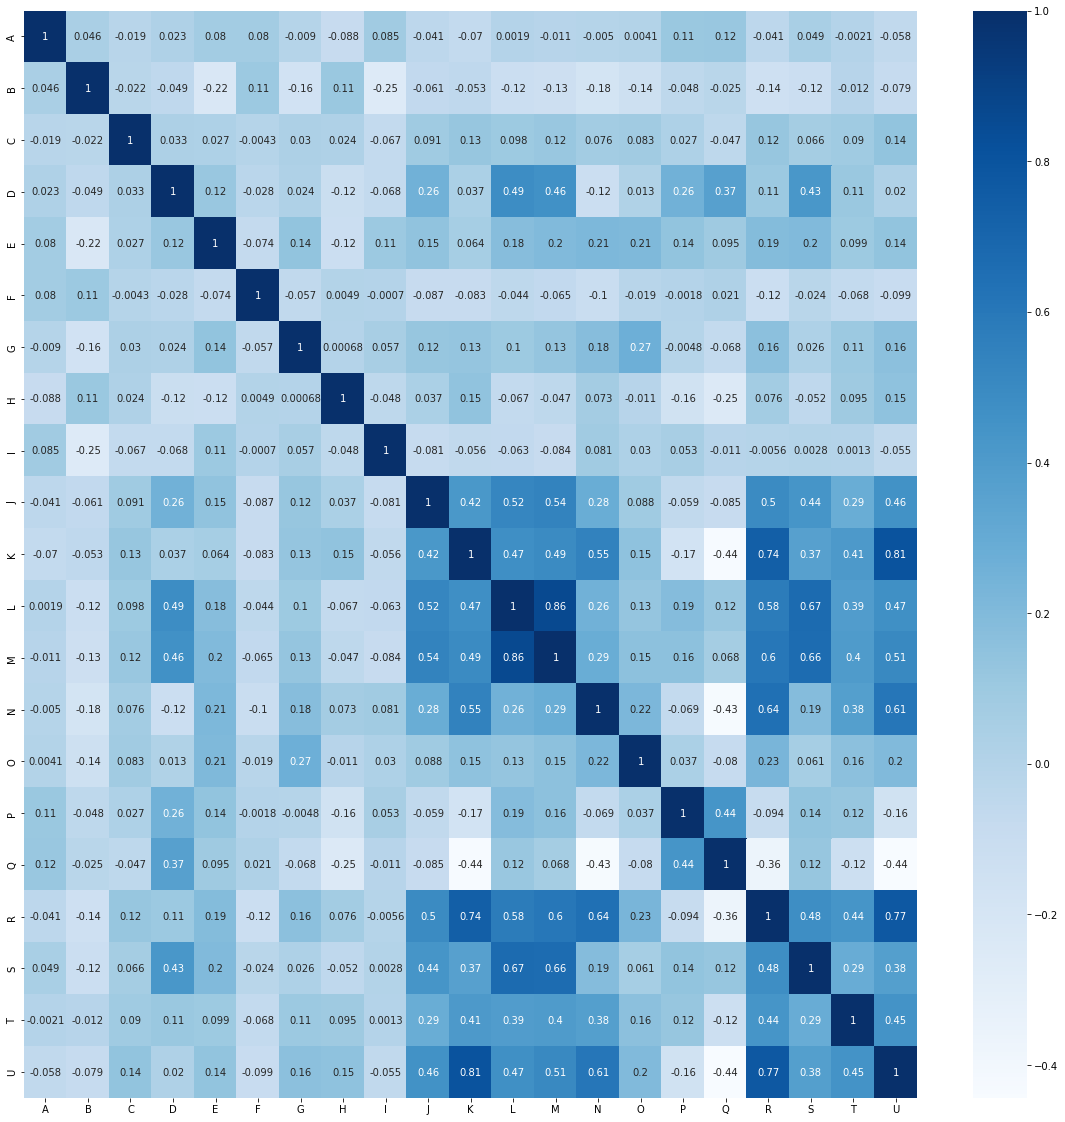

In [ ]:
# Ploting Alpha Correleration:
xAlph = alphabets
plt.figure(figsize = (20, 20))

# Determining Correleration and Ploting Heatmap:
xAlph = xAlph.corr()
sns.heatmap(xAlph, annot = True, cmap=plt.cm.Blues )
plt.show()

In [ ]:
## Selecting High Correlerated Values:
# Iterating over the Alpha:
for i in alphabets:
  xAlphCorr = xAlph[i]

  # Selecting Features over 0.2:
  relevantFeaturesAlph = xAlphCorr[xAlphCorr > 0.4]
  print(relevantFeaturesAlph)

A    1.0
Name: A, dtype: float64
B    1.0
Name: B, dtype: float64
C    1.0
Name: C, dtype: float64
D    1.000000
L    0.486152
M    0.458742
S    0.429473
Name: D, dtype: float64
E    1.0
Name: E, dtype: float64
F    1.0
Name: F, dtype: float64
G    1.0
Name: G, dtype: float64
H    1.0
Name: H, dtype: float64
I    1.0
Name: I, dtype: float64
J    1.000000
K    0.421358
L    0.521704
M    0.538957
R    0.498057
S    0.438193
U    0.458289
Name: J, dtype: float64
J    0.421358
K    1.000000
L    0.472517
M    0.493770
N    0.547550
R    0.739726
T    0.411809
U    0.807413
Name: K, dtype: float64
D    0.486152
J    0.521704
K    0.472517
L    1.000000
M    0.861400
R    0.579503
S    0.672420
U    0.468875
Name: L, dtype: float64
D    0.458742
J    0.538957
K    0.493770
L    0.861400
M    1.000000
R    0.604985
S    0.662850
U    0.505318
Name: M, dtype: float64
K    0.547550
N    1.000000
R    0.641519
U    0.609447
Name: N, dtype: float64
O    1.0
Name: O, dtype: float64
P    1.000000

In [ ]:
# Defining Features:
sequence_ex = X[['sequence1','sequence2','sequence4','sequence5','sequence6','sequence8','sequence9']]
alphabet_ex = X[['D','J','K','L','M','N','Q','R','S','T','U']]
# Complete Features:
features = X[['sequence1','sequence2','sequence4','sequence5','sequence6','sequence8','sequence9','D','J','K','L','M','N','Q','R','S','T','U']]
# Viewing Features:
features.head()

,sequence1,sequence2,sequence4,sequence5,sequence6,sequence8,sequence9,D,J,K,L,M,N,Q,R,S,T,U
0,0,0,0,0,0,1,0,1,258,0.629858,0.855349,0.759439,0.795549,0.592184,0.791921,0.815254,0.965006,0.665915
1,0,0,0,0,0,1,0,4,69,0.502272,0.322749,0.343255,0.616352,0.352113,0.388835,0.412303,0.292696,0.549452
2,0,0,0,0,0,1,0,4,135,0.480456,0.413038,0.524760,0.580085,0.193988,0.935688,0.685868,0.277694,0.428115
3,0,0,0,0,1,3,3,8,156,0.492681,0.966719,0.943545,0.209744,0.845751,0.507320,0.927204,0.605755,0.454155
4,0,1,1,1,1,1,3,4,75,0.450248,0.302896,0.397622,0.506096,0.521673,0.365571,0.416094,0.584799,0.447149


In [ ]:
# Checking Target Value
y.head()

0    0
1    0
2    0
3    1
4    1
Name: mutation, dtype: int64

# **Modeling**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, y, train_size = 0.85, 
                                                      test_size = 0.15, random_state = 42)

**Random Forest**

In [ ]:
## Trying Random Forest
# Intializing
rfc = RandomForestClassifier(max_depth = 4, random_state = 42, n_estimators = 500)
rfc.fit(X_train, y_train)

# Getting Parameters:
#rfc.get_params()
# Getting Score:
rfc.score(X_train, y_train)

0.8200849673202615

In [ ]:
predict = rfc.predict(X_test)
#mean_absolute_error(y_test, predict)

In [ ]:
100 - (mean_absolute_error(y_test, predict)*100)

82.08888888888889

**Logestic Regression**

In [ ]:
## Trying Logistic Regression
# Intializing
model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)

# Getting Score:
model.score(X_train, y_train)

0.8172352941176471

In [ ]:
predict = model.predict(X_test)
#mean_absolute_error(y_test, predict)

In [ ]:
100 - (mean_absolute_error(y_test, predict)*100)

81.92592592592592

**K-Nearest Neighbors Classifier**

In [ ]:
## Trying K Nearest Neighbors Classifier
# Intializing
knn= KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p = 2)  
knn.fit(X_train, y_train)
# Scoring
knn.score(X_train, y_train) 

0.8645032679738562

In [ ]:
predict = knn.predict(X_test)

In [ ]:
100 - (mean_absolute_error(y_test, predict)*100)

81.7962962962963



---



-- End --



In [ ]:
from sklearn import tree

[Text(0.5, 0.9, 'X[3] <= 0.5\ngini = 0.388\nsamples = 96716\nvalue = [112643, 40357]'),
 Text(0.25, 0.7, 'X[15] <= 0.626\ngini = 0.24\nsamples = 51796\nvalue = [70315, 11425]'),
 Text(0.125, 0.5, 'X[1] <= 0.5\ngini = 0.181\nsamples = 40266\nvalue = [57173, 6405]'),
 Text(0.0625, 0.3, 'X[6] <= 0.5\ngini = 0.159\nsamples = 37964\nvalue = [54705, 5206]'),
 Text(0.03125, 0.1, 'gini = 0.146\nsamples = 36315\nvalue = [52823, 4537]'),
 Text(0.09375, 0.1, 'gini = 0.387\nsamples = 1649\nvalue = [1882, 669]'),
 Text(0.1875, 0.3, 'X[15] <= 0.395\ngini = 0.44\nsamples = 2302\nvalue = [2468, 1199]'),
 Text(0.15625, 0.1, 'gini = 0.397\nsamples = 1515\nvalue = [1731, 650]'),
 Text(0.21875, 0.1, 'gini = 0.489\nsamples = 787\nvalue = [737, 549]'),
 Text(0.375, 0.5, 'X[7] <= 5.5\ngini = 0.4\nsamples = 11530\nvalue = [13142, 5020]'),
 Text(0.3125, 0.3, 'X[1] <= 0.5\ngini = 0.274\nsamples = 5730\nvalue = [7586, 1484]'),
 Text(0.28125, 0.1, 'gini = 0.244\nsamples = 5374\nvalue = [7294, 1212]'),
 Text(0.343

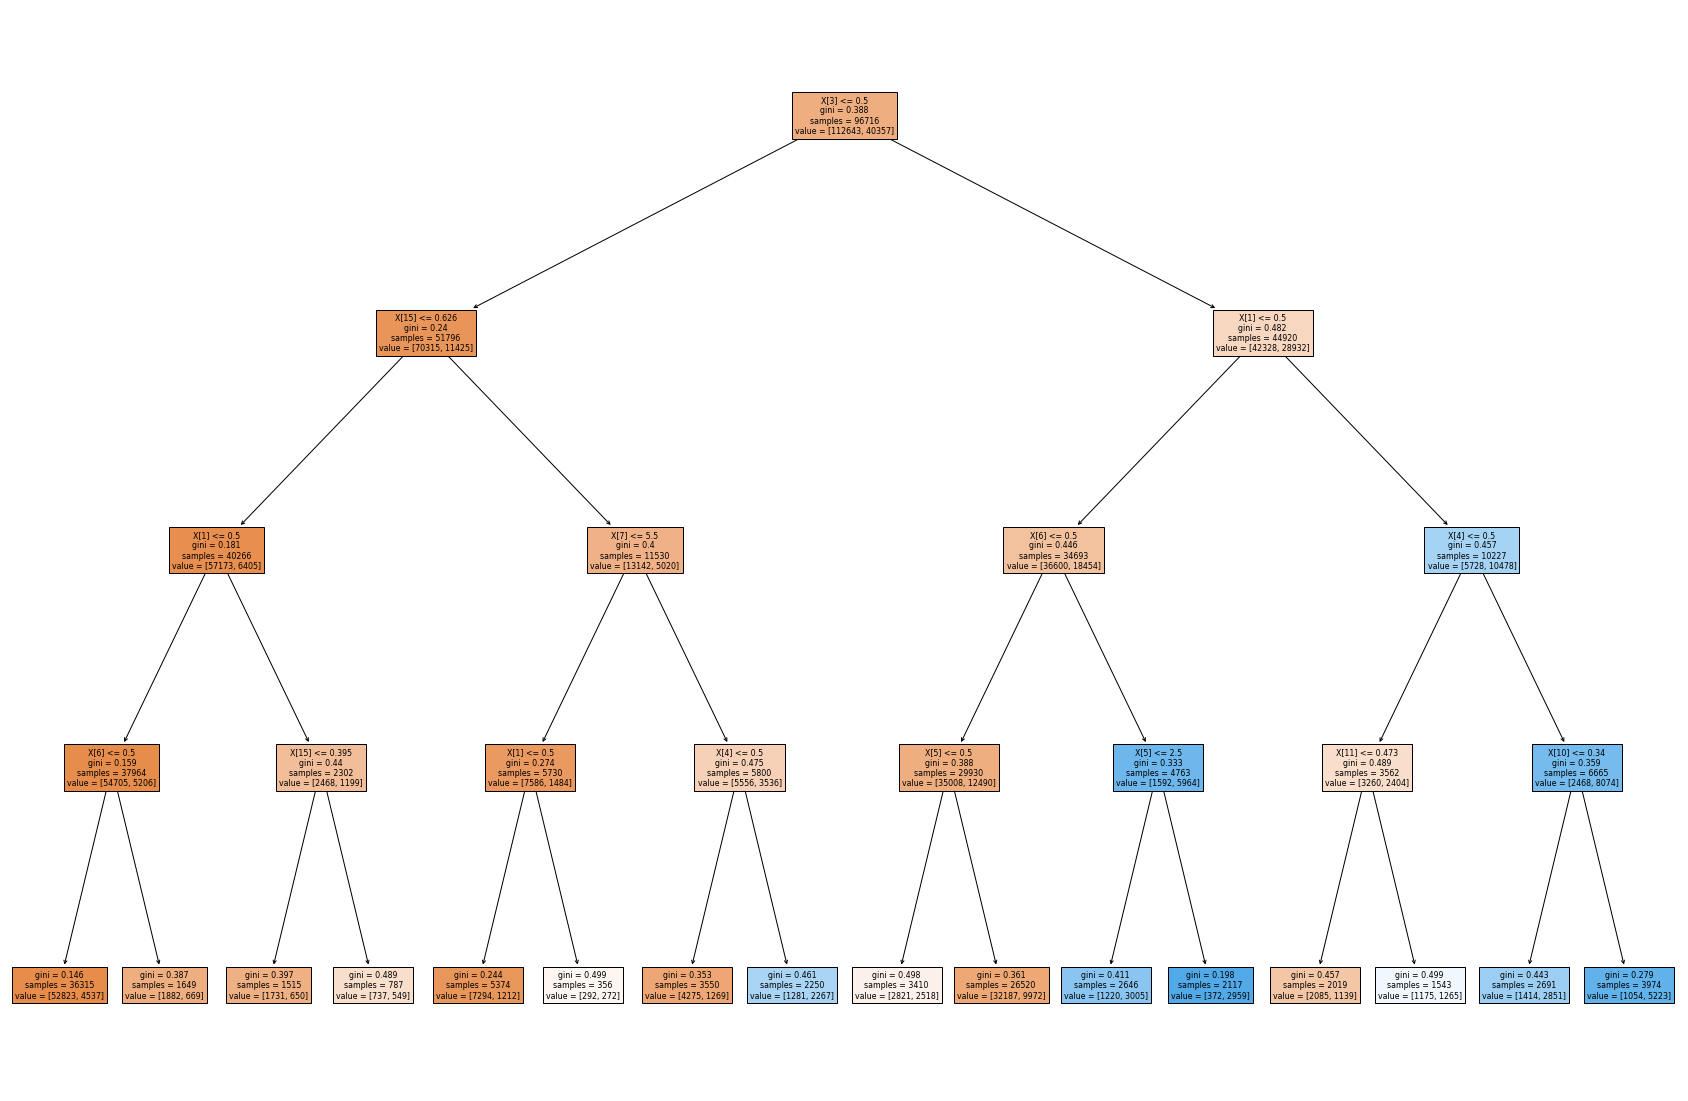

In [ ]:
plt.figure(figsize=(30, 20))
tree.plot_tree(rfc.estimators_[2], filled=True)